# Stoneburner, Kurt
- ## DSC 640 - Week 05/06: Tree, Area & Stacked Charts

1 tree map, 1 area chart and 1 stacked area chart using Python


https://fcpython.com/visualisation/python-treemaps-squarify-matplotlib
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/colorbar_placement.html
https://matplotlib.org/stable/tutorials/colors/colormaps.html


Convert A Colormap into categorical Colors

In [1]:
#col = 'expenditure'
#vmin=min(plot_df[col])
#vmax=max(plot_df[col])
#norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
#colors = [matplotlib.cm.inferno(norm(value)) for value in plot_df[col]]

In [2]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import squarify 
#conda install -c conda-forge squarify

from PIL import Image

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [3]:
#z_wk05_06_expenditures.txt
#z_wk05_06_unemployement-rate-1948-2010.csv

ex_df = pd.read_csv("z_wk05_06_expenditures.txt",sep="\t")

#//*** Setup a type dictionary to associate columns with a particular type.
type_dict = {
    'year' : int,
    'category' : str,
    'expenditure' : int,
    'sex' : int,
}

#//*** Assign column types
for col,col_type in type_dict.items():
    ex_df[col] = ex_df[col].astype(col_type)

del ex_df['sex']

ex_df['category'] = ex_df['category'].str.replace('Miscellaneous',"Misc")
ex_df['category'] = ex_df['category'].str.replace('Cash Contributions',"Cash")
ex_df['category'] = ex_df['category'].str.replace('Tobacco Products',"Tobacco")
ex_df['category'] = ex_df['category'].str.replace('Alcoholic Beverages',"Alcohol")




    
ex_df


,year,category,expenditure
0,2008,Food,6443
1,2008,Alcohol,444
2,2008,Housing,17109
3,2008,Apparel,1801
4,2008,Transportation,8604
...,...,...,...
345,1984,Education,303
346,1984,Tobacco,228
347,1984,Misc,451
348,1984,Cash,706


In [4]:
out_df = pd.DataFrame()
for group in ex_df.groupby('year'):
    loop_df = group[1].copy()
    loop_df['percent'] = loop_df['expenditure'] / loop_df['expenditure'].sum()
    out_df = pd.concat([out_df,loop_df])
ex_df = out_df.copy()
del out_df

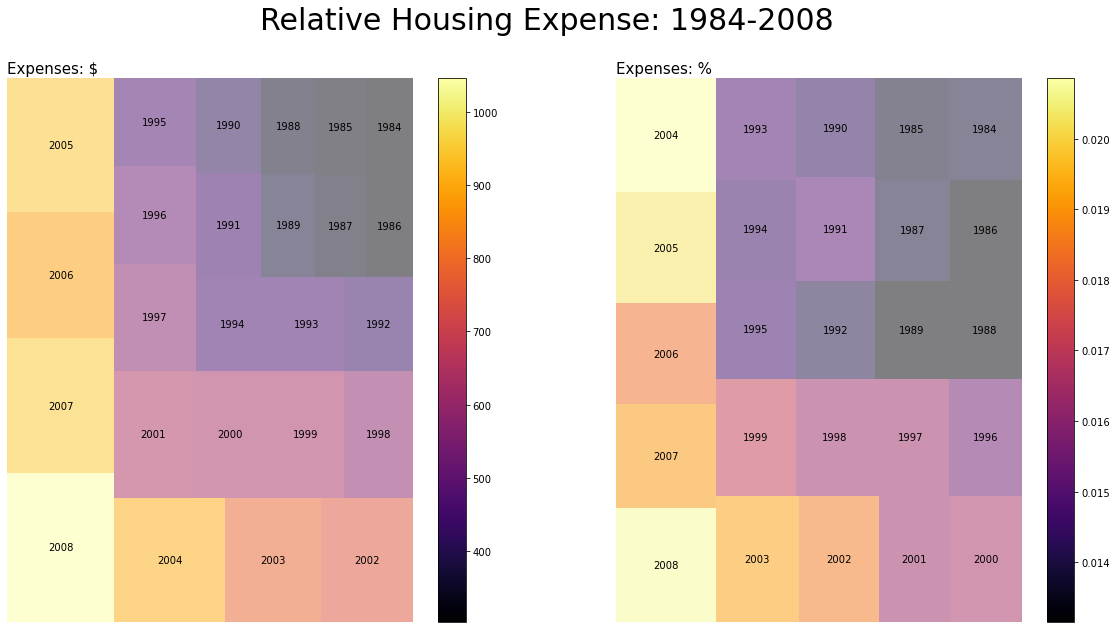

In [5]:
import matplotlib
pp = {
    'x_figsize' : 20,
    'y_figsize' : 10,
    'x_col1' : 'expenditure',
    'x_col2' : 'percent',
    'label_col' : 'category',
    'fontsize_title' : 15,
    #'label_col' : 'expenditure',
}

fig, ax = plt.subplots(ncols=2)
fig = plt.gcf()
fig.set_size_inches(20,10)

plot_df = ex_df[ex_df['year']==2008]
plot_df = ex_df[ex_df['category']=='Education'].sort_values('year',ascending=False)

col = 'expenditure'
vmin=min(plot_df[col])
vmax=max(plot_df[col])
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
colors = [matplotlib.cm.inferno(norm(value)) for value in plot_df[col]]

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=plt.inferno(), norm=norm)

# empty array for the data range
sm._A = []

fig.colorbar(sm,ax=ax[0])

ax1 = squarify.plot(sizes=plot_df[col], label=plot_df['year'], alpha=.5,color=colors,ax=ax[0])
ax1.yaxis.label.set_size(106)


col = 'percent'
vmin=min(plot_df[col])
vmax=max(plot_df[col])
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
colors = [matplotlib.cm.inferno(norm(value)) for value in plot_df[col]]

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=plt.inferno(), norm=norm)

# empty array for the data range
sm._A = []

fig.colorbar(sm,ax=ax[1])
ax2 = squarify.plot(sizes=plot_df[col], label=plot_df['year'], alpha=.5,color=colors,ax=ax[1])

ax1.axis('off')
ax2.axis('off')

plt.text(pp['x_figsize']*-7.5,pp['y_figsize']*10.1,"Expenses: $ ",fontsize=15)
plt.text(pp['x_figsize']*0,pp['y_figsize']*10.1,"Expenses: % ",fontsize=15)
plt.suptitle(f"Relative Housing Expense: 1984-2008",fontsize=30)

plt.show()
#plt.magma()
#plot_df

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_1.jpg


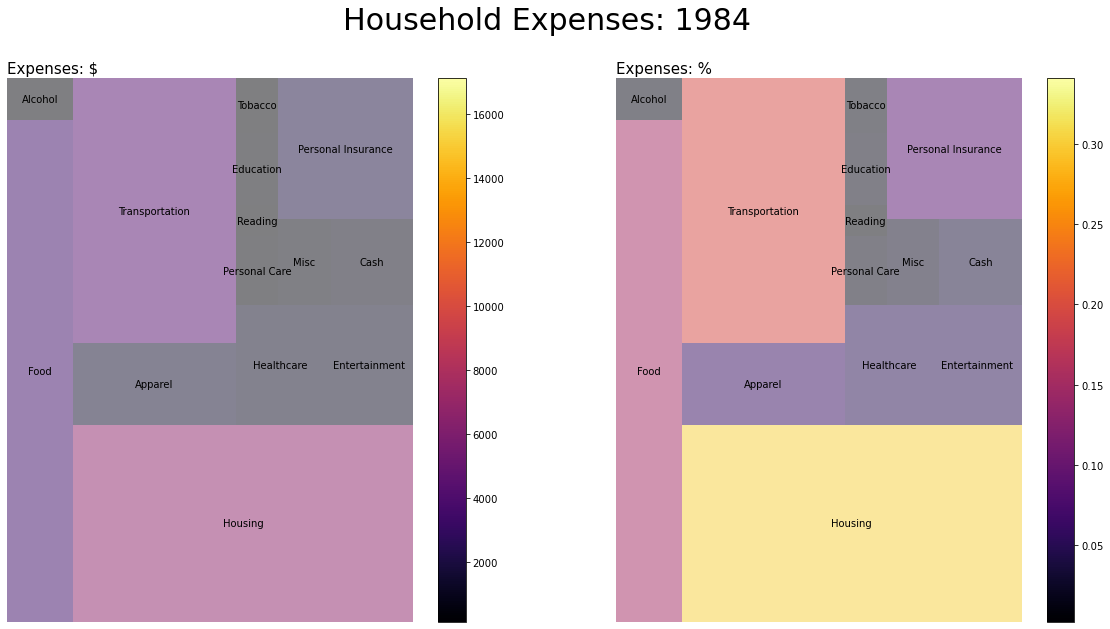

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_2.jpg


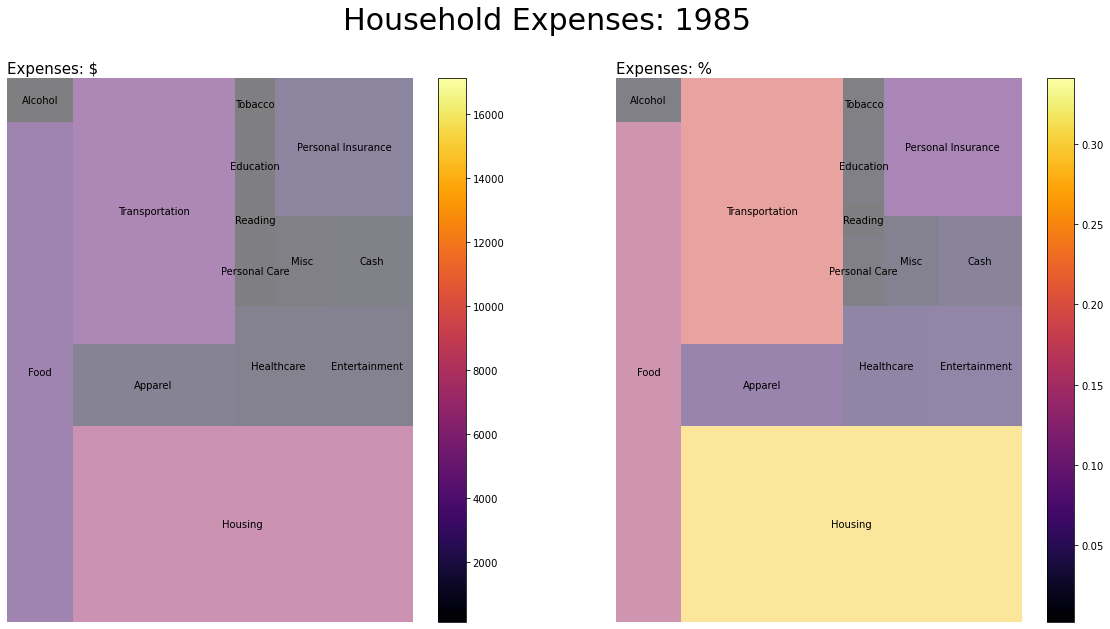

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_3.jpg


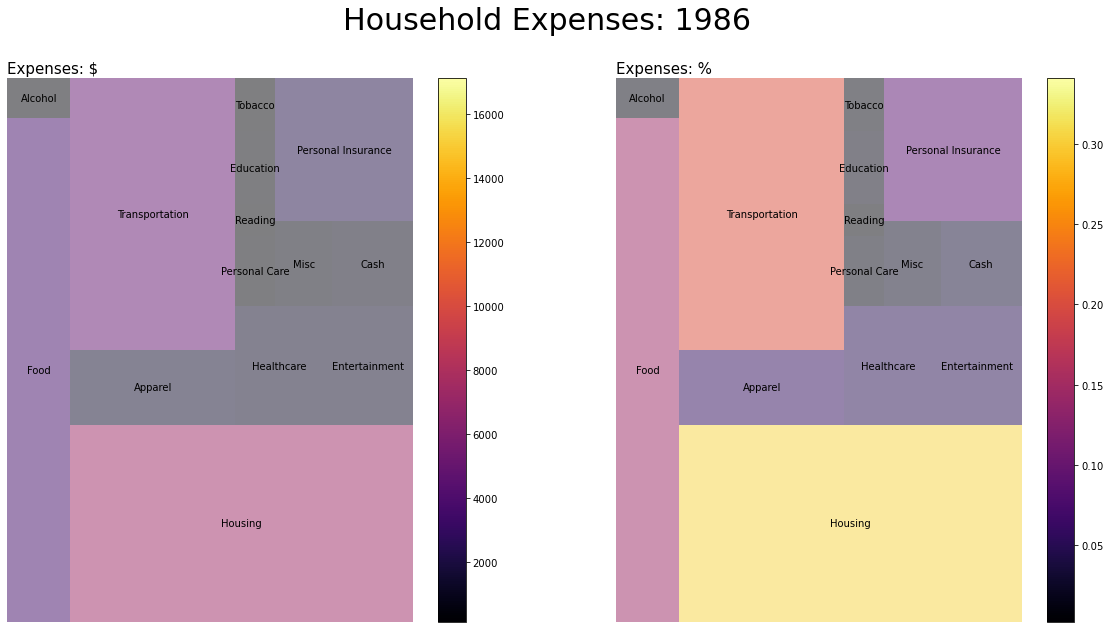

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_4.jpg


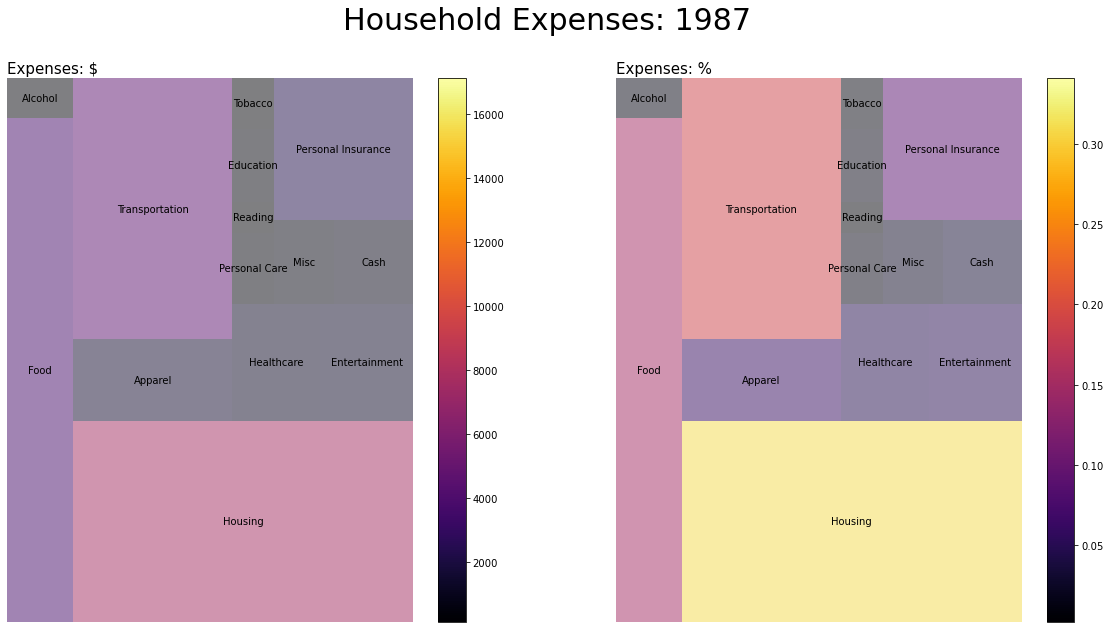

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_5.jpg


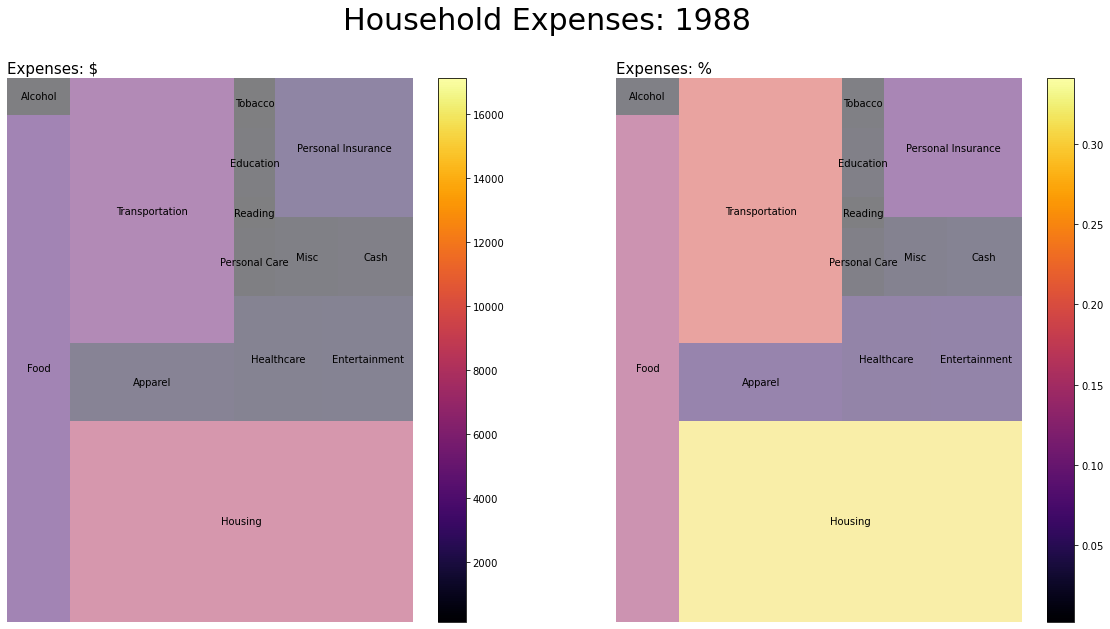

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_6.jpg


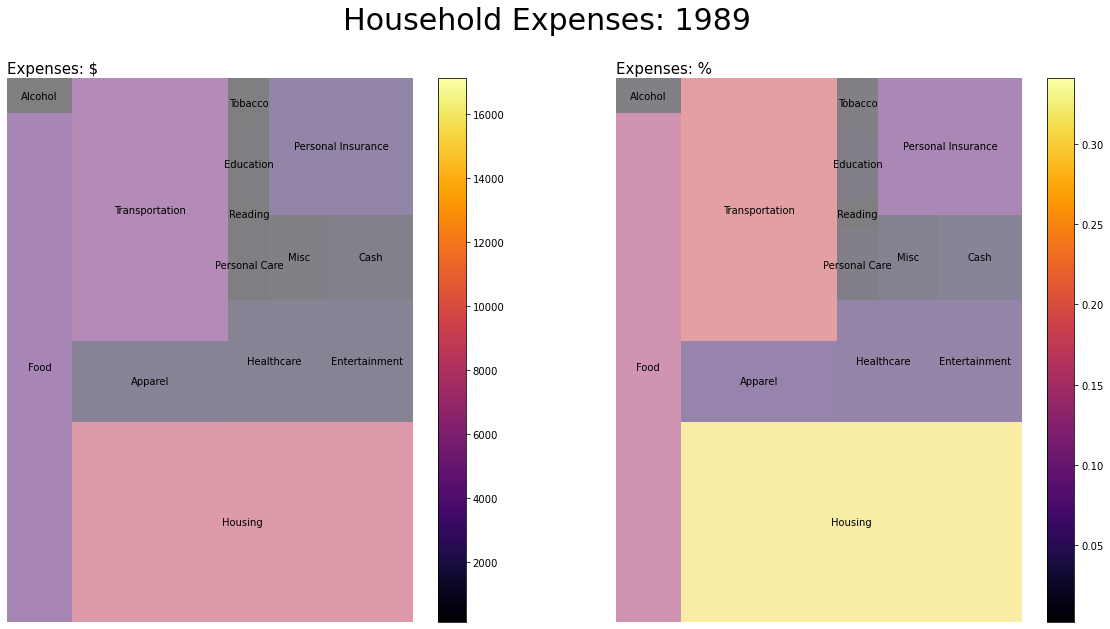

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_7.jpg


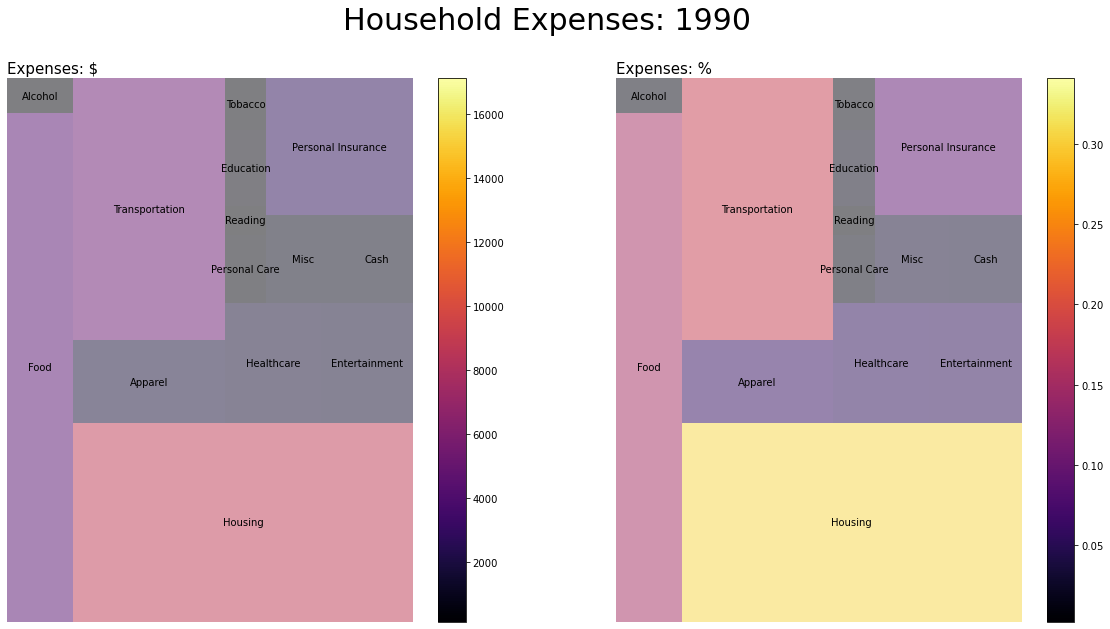

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_8.jpg


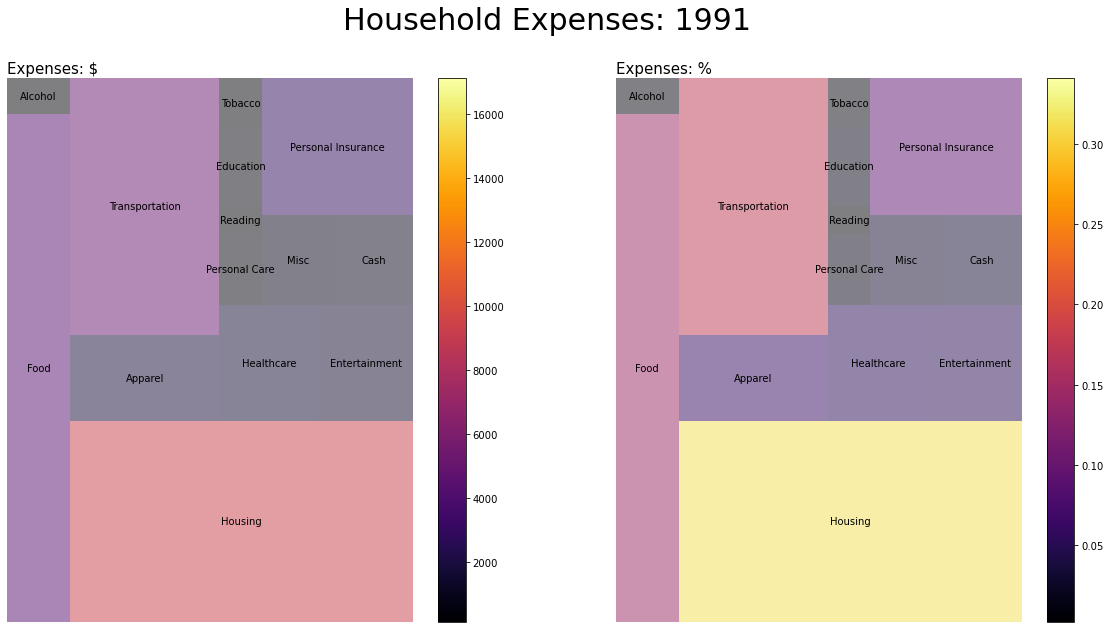

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_9.jpg


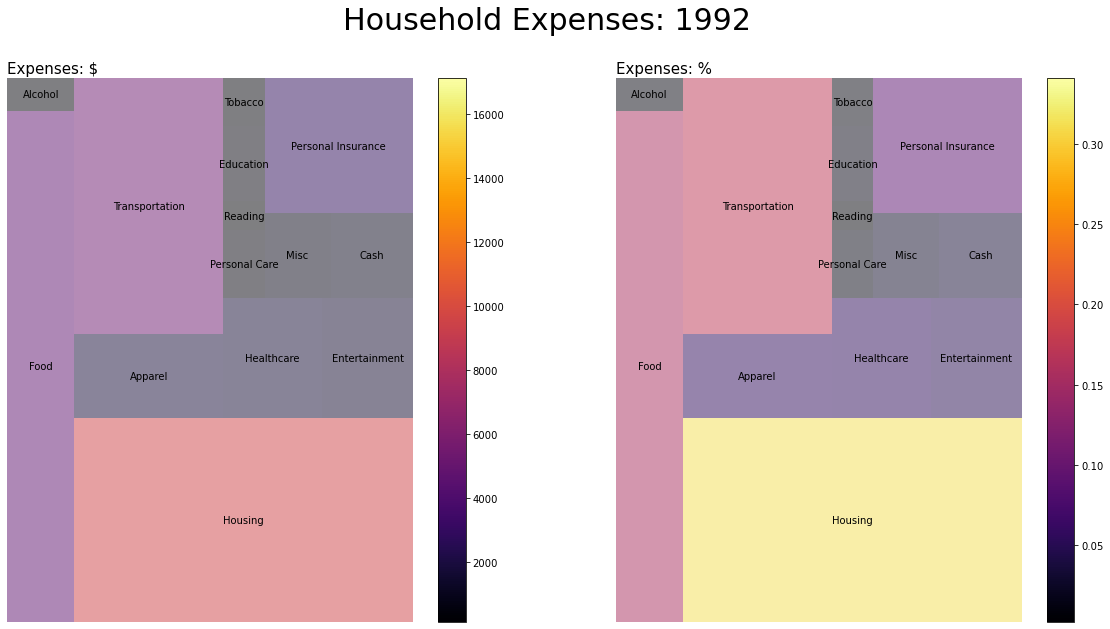

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_10.jpg


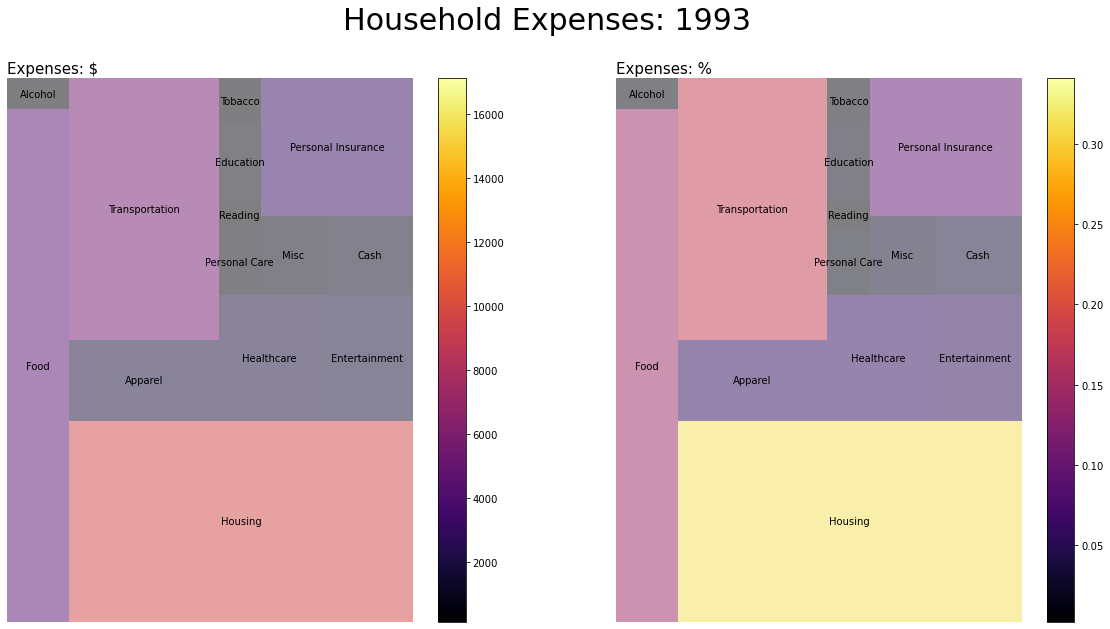

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_11.jpg


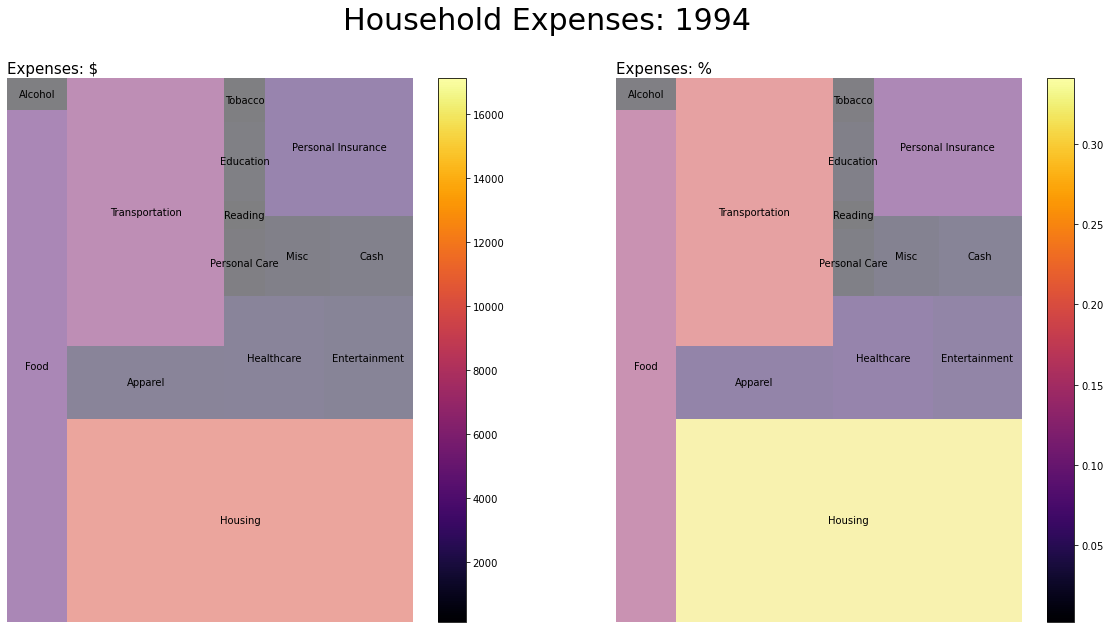

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_12.jpg


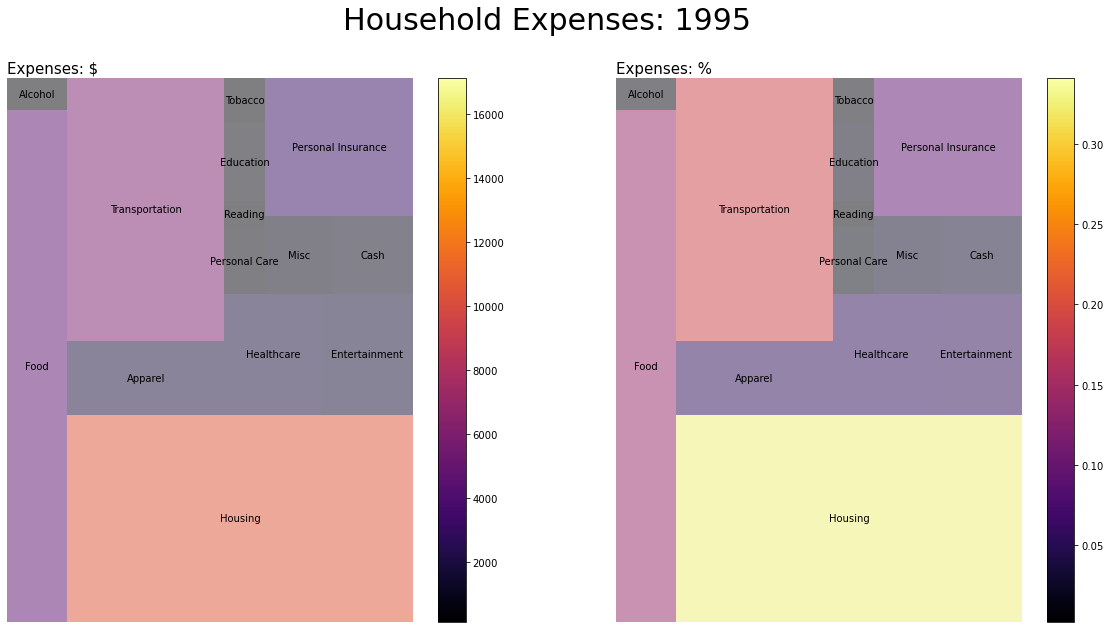

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_13.jpg


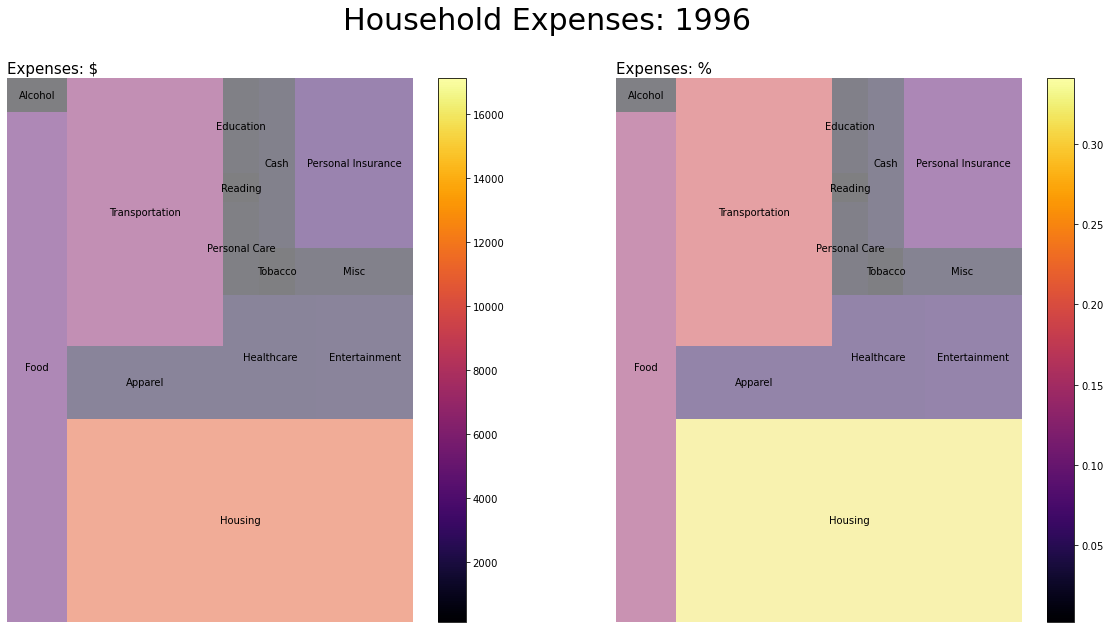

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_14.jpg


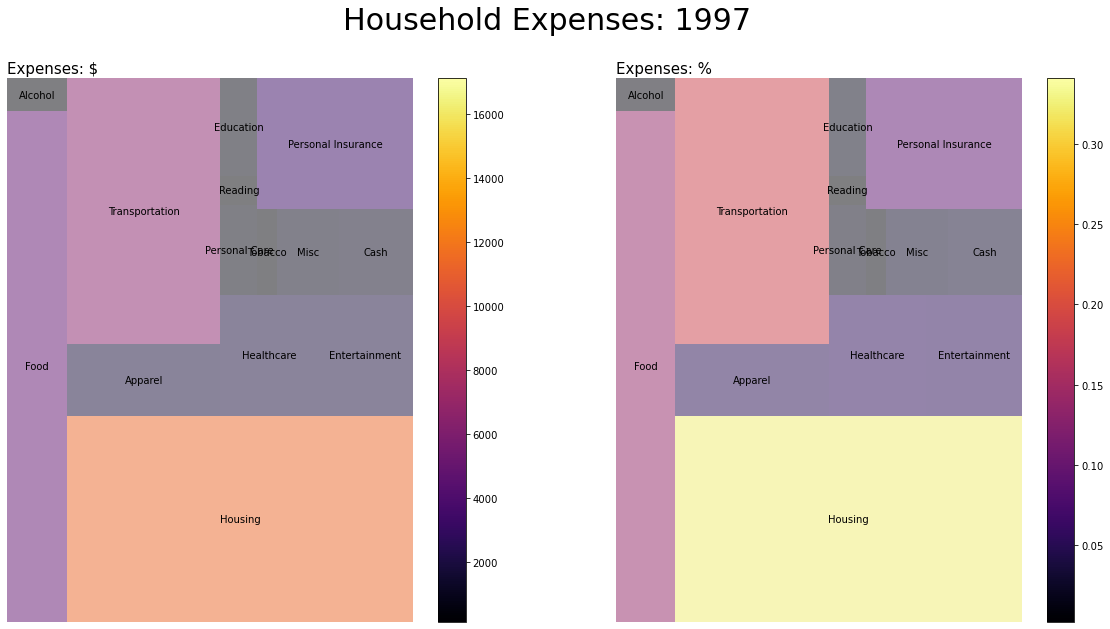

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_15.jpg


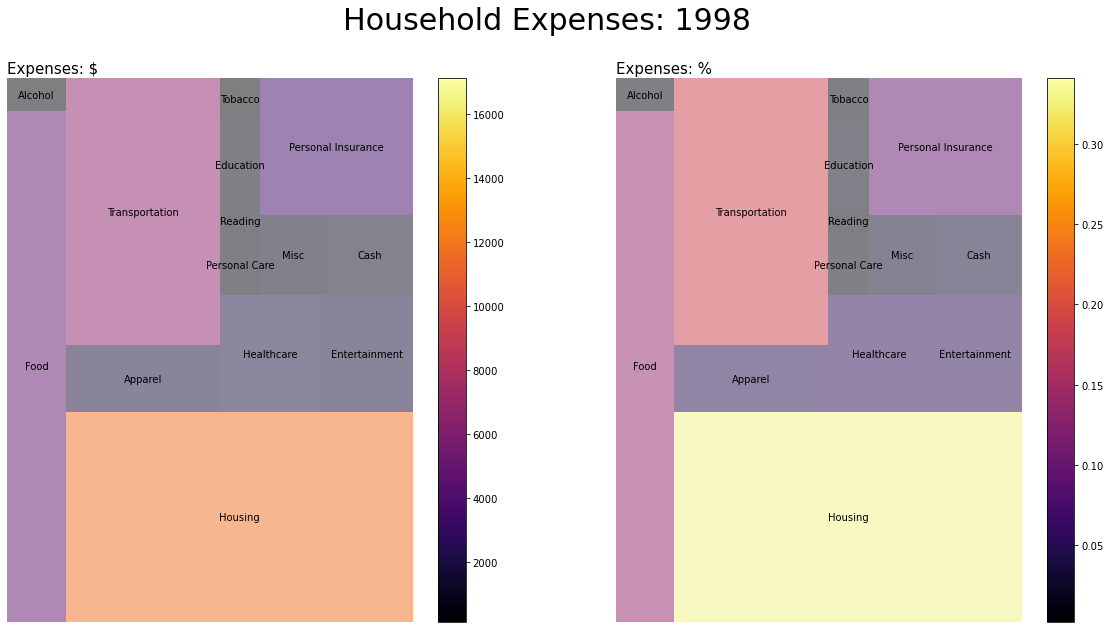

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_16.jpg


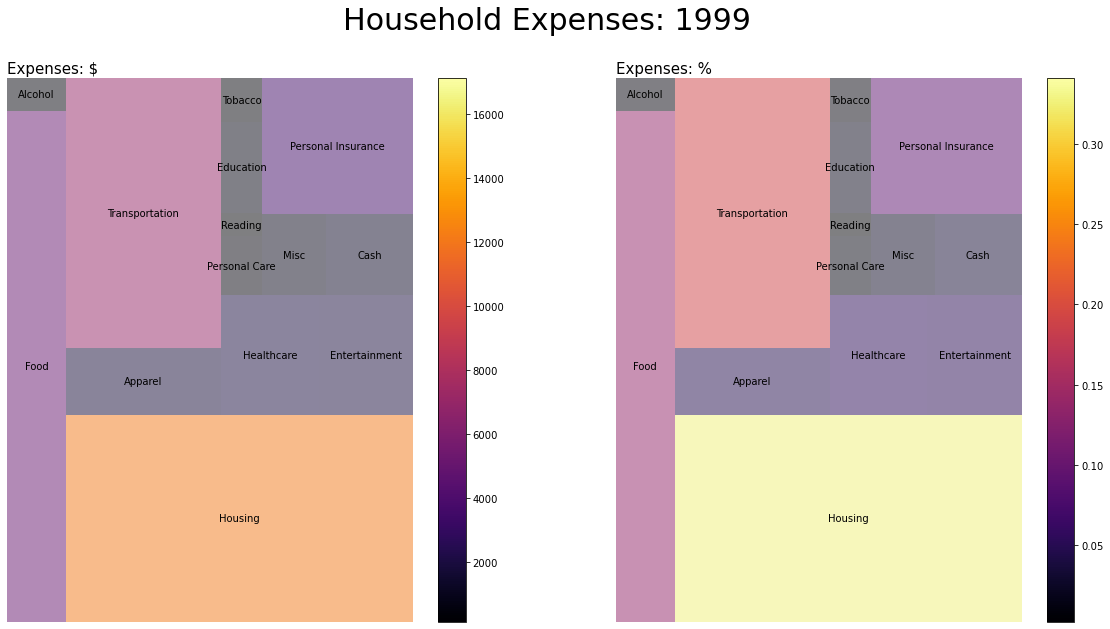

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_17.jpg


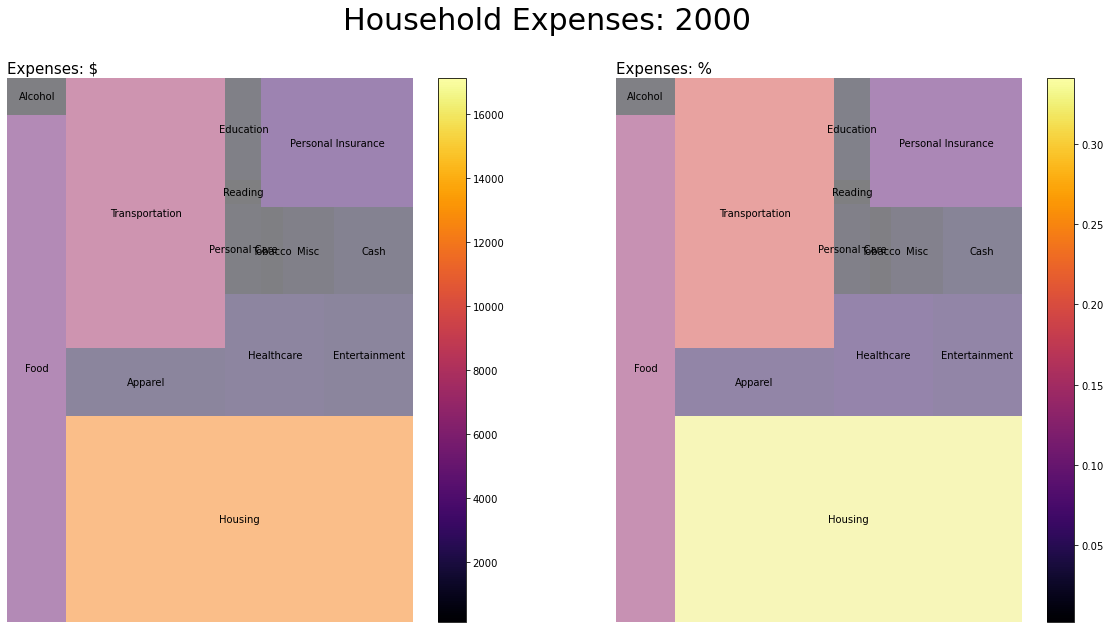

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_18.jpg


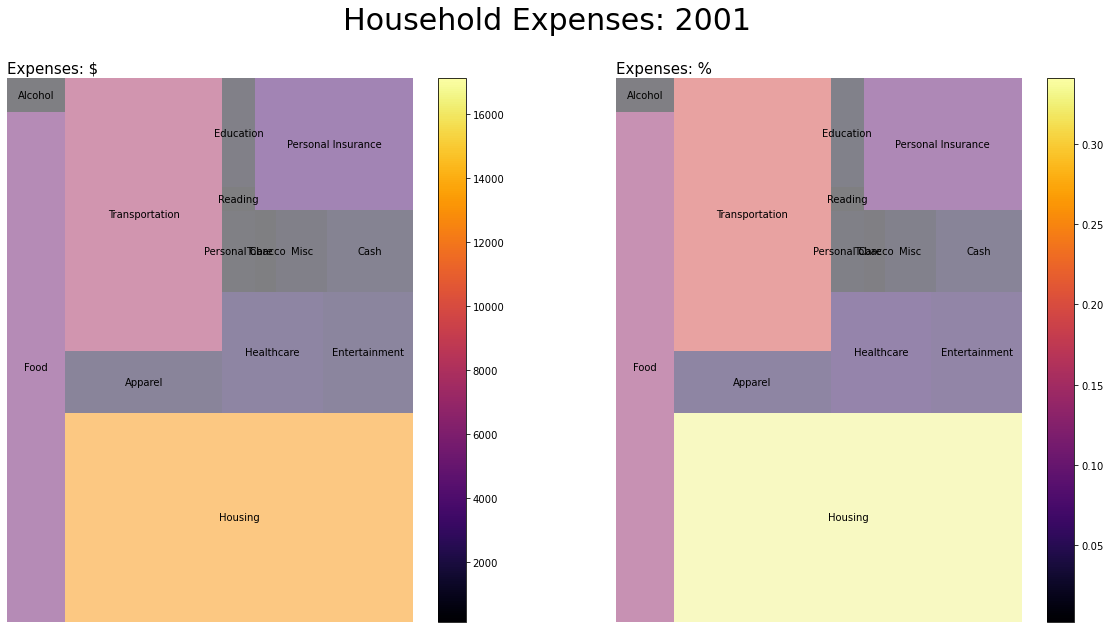

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_19.jpg


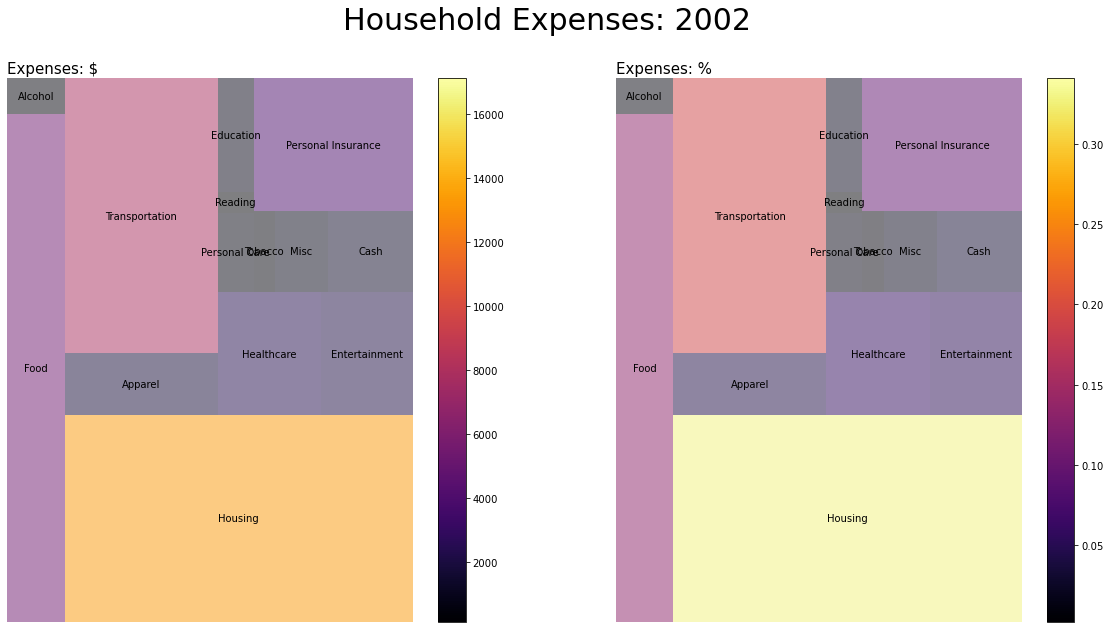

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_20.jpg


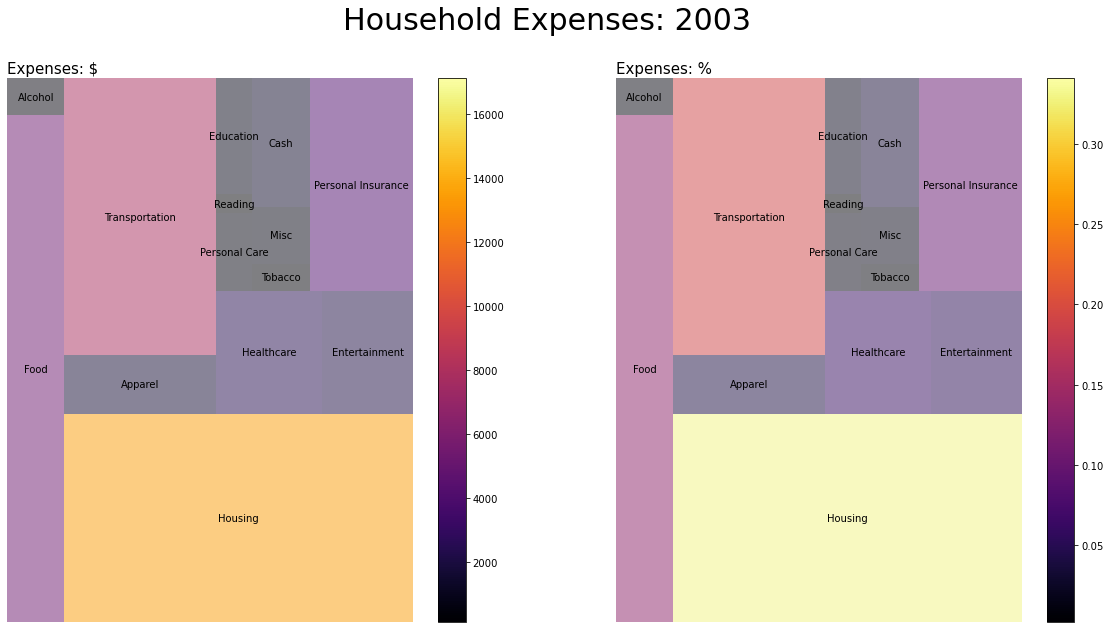

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_21.jpg


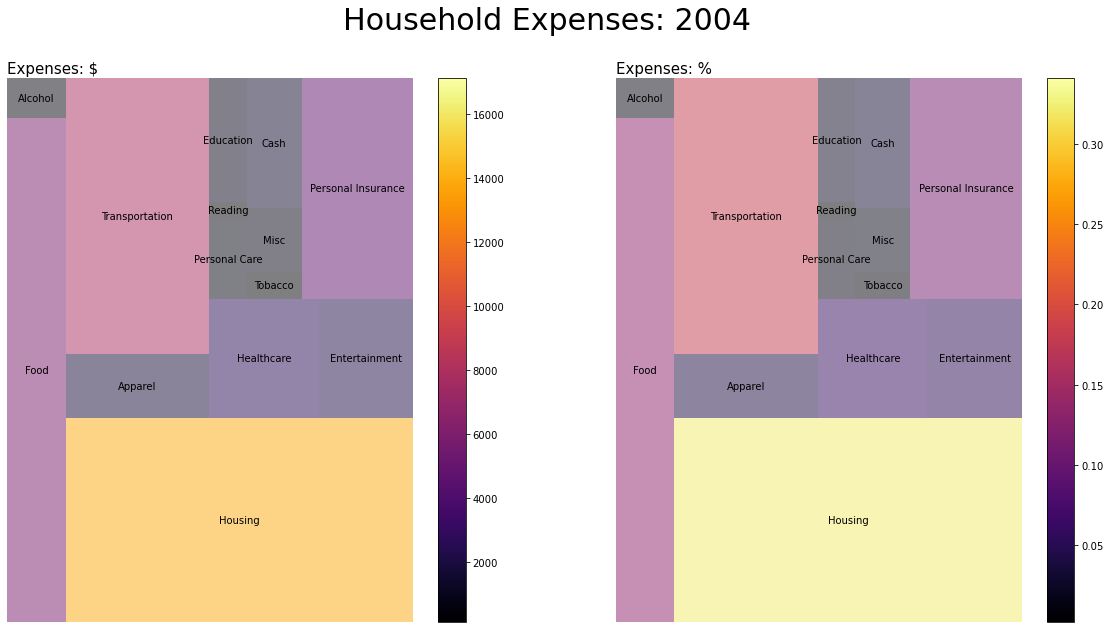

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_22.jpg


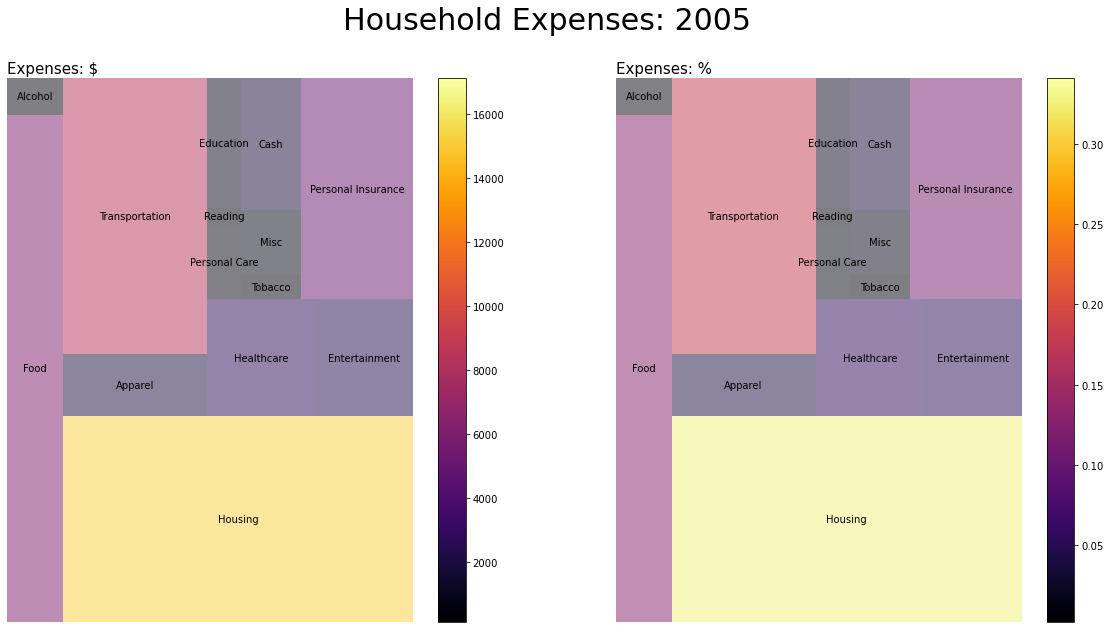

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_23.jpg


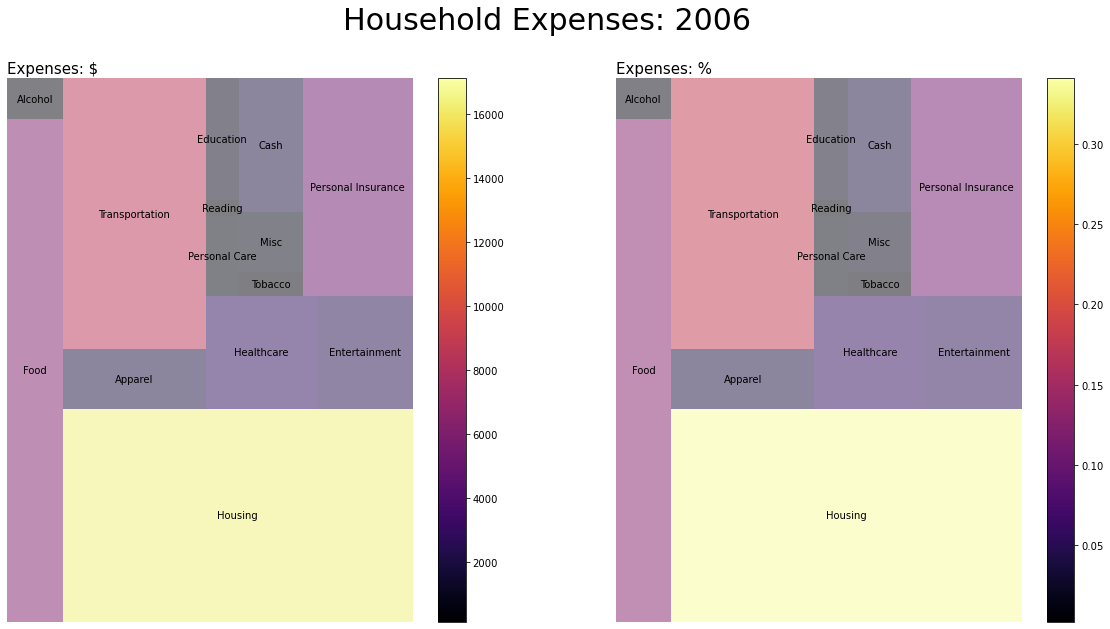

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_24.jpg


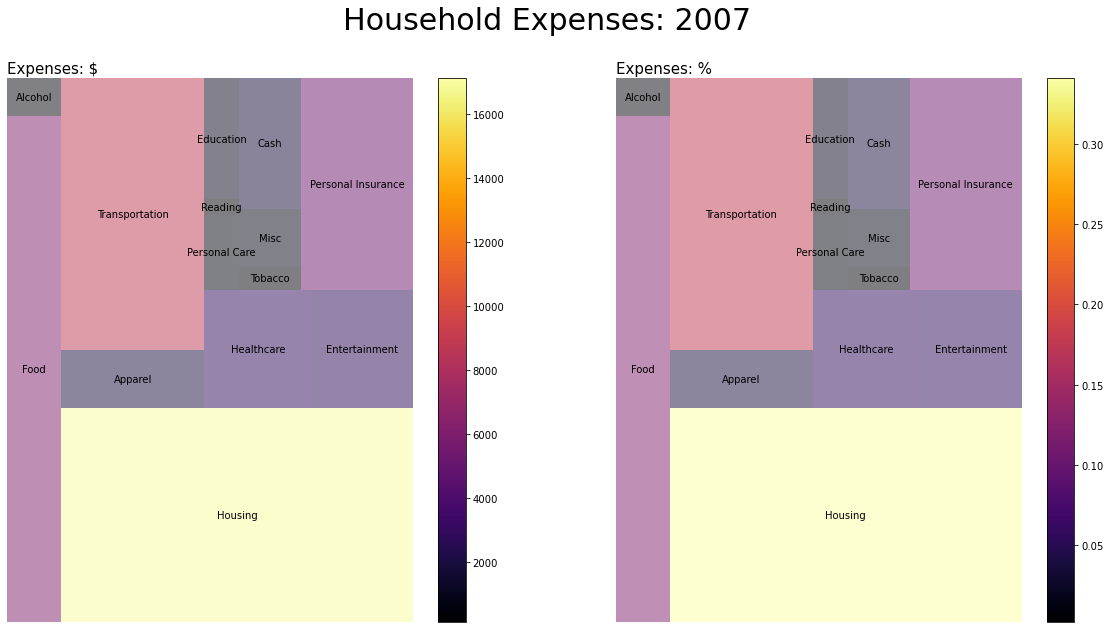

C:/Users/stonk013/DSC/DSC640/anim_gif/wk05/wk05_expend_percent_25.jpg


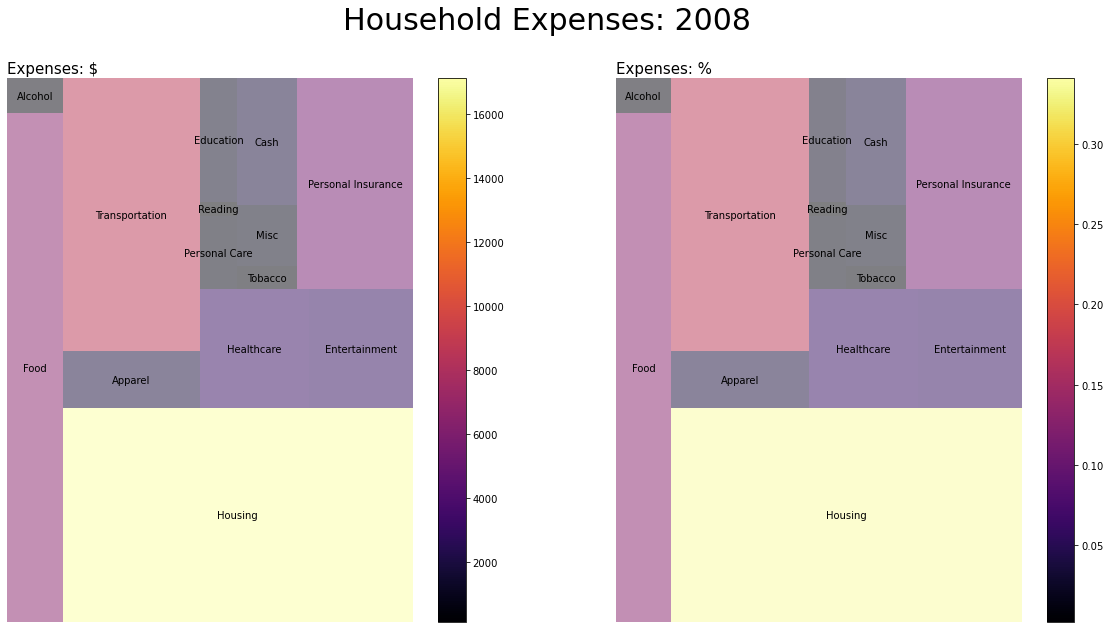

Building GIF...
Done...


In [6]:
#//*** Plot Points, Holds Common grah data in a central dictionary
pp = {
    'x_figsize' : 20,
    'y_figsize' : 10,
    'x_col1' : 'expenditure',
    'x_col2' : 'percent',
    'label_col' : 'category',
    'fontsize_title' : 15,
    #'label_col' : 'expenditure',
}

#//*** Add A conditional so it doesn't render *every* time
if True:
    #//********************************************
    #//*** Build Output Filepath
    #//********************************************
    filepath = os.getcwd()
    filepath = filepath.replace("\\","/")
    filepath = f"{filepath}/anim_gif/wk05/"

    files_jpg = []
    gif_files = []
    
    filename_base = "wk05_expend_percent_"
    #//********************************************
    
    first=True
    file_counter = 0
    
    #//*** Set Colormap for Percent Color Bars
    plot_df = ex_df
    col = 'percent'
    vmin=min(plot_df[col])
    vmax=max(plot_df[col])
    norm_percent = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
        
    
    #//*** Use Single Colorbar Scale expend plots.
    #//*** Set Colormap for Percent Color Bars
    plot_df = ex_df
    col = 'expenditure'
    vmin=min(plot_df[col])
    vmax=max(plot_df[col])
    norm_expend = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    
    
    
    for group in ex_df.groupby('year'):
        year = group[0]
        plot_df = group[1]
        
        file_counter += 1

        save_filename = f"{filepath}{filename_base}{file_counter}.jpg"
        
        #//*** Initialize the plots
        fig, ax = plt.subplots(ncols=2)
        fig = plt.gcf()
        fig.set_size_inches(pp['x_figsize'],pp['y_figsize'])
        
        # Build Colorbars
        sm_expend = plt.cm.ScalarMappable(cmap=plt.inferno(), norm=norm_expend)
        sm_percent = plt.cm.ScalarMappable(cmap=plt.inferno(), norm=norm_percent)
    
        #//*** Add Colorbar
        fig.colorbar(sm_expend,ax=ax[0])
        fig.colorbar(sm_percent,ax=ax[1])
        
        #//*** Build Colors 
        colors_expend = [matplotlib.cm.inferno(norm_expend(value)) for value in   plot_df[pp['x_col1']]]
        colors_percent = [matplotlib.cm.inferno(norm_percent(value)) for value in plot_df[pp['x_col2']]]
        
        
        
        ax1 = squarify.plot(sizes=plot_df[pp['x_col1']], label=plot_df[pp['label_col']], alpha=.5,color=colors_expend,ax=ax[0])
        
        ax2 = squarify.plot(sizes=plot_df[pp['x_col2']], label=plot_df[pp['label_col']], alpha=.5,color=colors_percent,ax=ax[1])
        
        
        
        ax1.axis('off')
        ax2.axis('off')
        plt.text(pp['x_figsize']*-7.5,pp['y_figsize']*10.1,"Expenses: $ ",fontsize=pp['fontsize_title'])
        plt.text(pp['x_figsize']*0,pp['y_figsize']*10.1,"Expenses: % ",fontsize=pp['fontsize_title'])
        plt.suptitle(f"Household Expenses: {year}",fontsize=pp['fontsize_title']*2)
        
        print(save_filename)
        plt.savefig(save_filename,pil_kwargs={'quality': 95})

        plt.show()

        #//*** Read Files and Prepare Animated GID
        if first == True:
            first=False
            first_img = Image.open(save_filename).convert("P",palette=Image.ADAPTIVE)
        else:
            gif_files.append(Image.open(save_filename).convert("P",palette=Image.ADAPTIVE) )
        
        
    print("Building GIF...")
    #//*** Build and Save Animated GIF
    first_img.save("wk05_06_expenditure_1.gif", save_all=True, optimize=False, append_images=gif_files, duration=1000, loop=0)
    print("Done...")

In [7]:
plot_df

,year,category,expenditure,percent
0,2008,Food,6443,0.127612
1,2008,Alcohol,444,0.008794
2,2008,Housing,17109,0.338866
3,2008,Apparel,1801,0.035671
4,2008,Transportation,8604,0.170413
5,2008,Healthcare,2976,0.058944
6,2008,Entertainment,2835,0.056151
7,2008,Personal Care,616,0.012201
8,2008,Reading,116,0.002298
9,2008,Education,1046,0.020717


In [26]:
emp_df = pd.read_csv("z_wk05_06_unemployement-rate-1948-2010.csv")

emp_df[emp_df['Year'] == 1950]



,Series id,Year,Period,Value
24,LNS14000000,1950,M01,6.5
25,LNS14000000,1950,M02,6.4
26,LNS14000000,1950,M03,6.3
27,LNS14000000,1950,M04,5.8
28,LNS14000000,1950,M05,5.5
29,LNS14000000,1950,M06,5.4
30,LNS14000000,1950,M07,5.0
31,LNS14000000,1950,M08,4.5
32,LNS14000000,1950,M09,4.4
33,LNS14000000,1950,M10,4.2


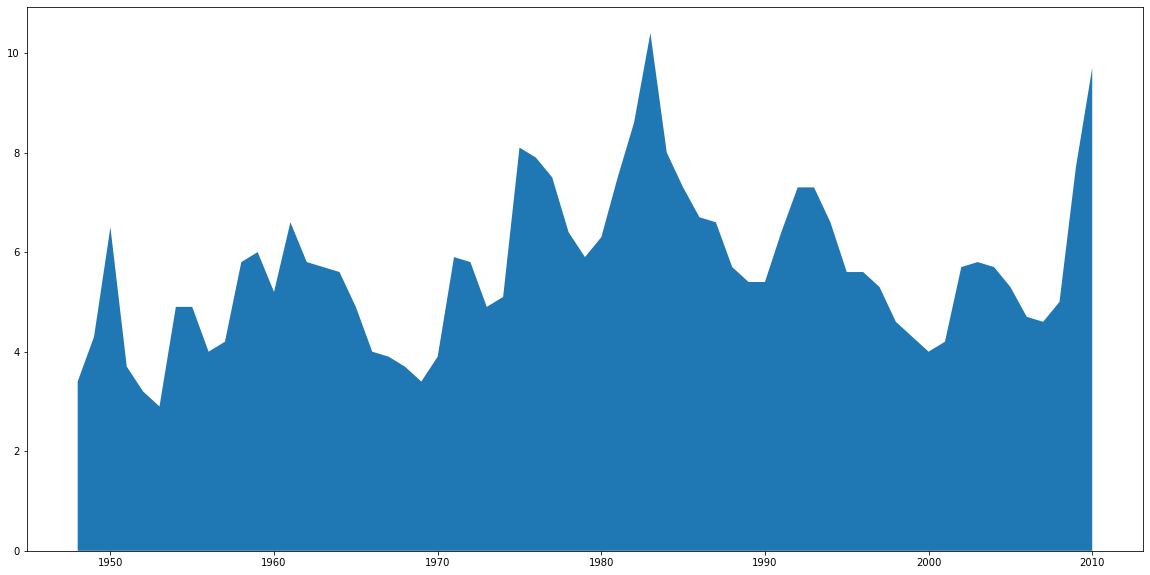

In [17]:
#https://www.python-graph-gallery.com/250-basic-stacked-area-chart

#//*** Plot Points, Holds Common grah data in a central dictionary
pp = {
    'x_figsize' : 20,
    'y_figsize' : 10,
    'x_col' : 'Year',
    'y_col' : 'Value',
    'x_ticks' : 'Year',
    'label_col' : 'category',
    'fontsize_title' : 15,
    #'label_col' : 'expenditure',
}

plot_df = emp_df[emp_df['Period'] == "M01"]

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(pp['x_figsize'],pp['y_figsize'])

plt.stackplot(plot_df[pp['x_col']],plot_df[pp['y_col']] )

plt.show()

In [10]:
# //*** CODE HERE

In [11]:
# //*** CODE HERE

In [12]:
# //*** CODE HERE